[TOC](../toc.ipynb)

Integration in Python
=====================

- KEYWORDS: integration, trapz, cumtrapz, quad


Integration is used for many purposes in scientific problem solving. It can:

1.  Represent the area under a curve or between curves
2.  Solve differential equations

We may have data that represents a function that needs to be integrated, or a function we want to integrate, or a differential equation we want to solve. We may also have data that represents some function, and that we wish to integrate.

Historically, we would have to look up or remember the formula for an integral, e.g. in a book like the 16<sup>th</sup> ed. CRC Standard Mathematical Tables, or tabulated in a page like [http://integral-table.com/downloads/single-page-integral-table.pdf](http://integral-table.com/downloads/single-page-integral-table.pdf)

![image.png](integral-table.png)

There are a limited number of known analytical integrals, and for everything else, we have to resort to numerical/computational approaches to evaluate them.

# Numerical integration of data



Data can be used to represent functions. Suppose we have the function $y=x^2$, and 5 $x$ values evenly spaced from 1 to 4. We can represent this function numerically with data like this.

```{note}
By data, we mean a smallish set of (x, y) points, for example. This is different than having a function which is continuous, and where you compute y-values from x-values.
```

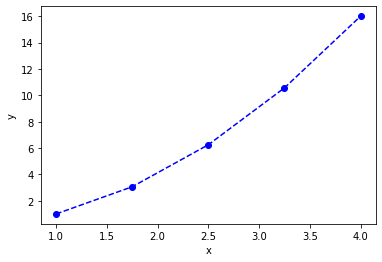

In [1]:
import numpy as np

x = np.linspace(1, 4, 5)
y = x**2

import matplotlib.pyplot as plt

plt.plot(x, y, "bo--")  # plot with blue circles connected by a dashed line
plt.xlabel("x")
plt.ylabel("y");

If we want the area under this curve, it is represented by:

$A = \int_1^4 x^2 dx$

We could analytically evaluate this as:

$A = \frac{1}{3} (4^3 - 1^3)$.

Here is the analytical answer for future reference:



In [2]:
1 / 3 * (4**3 - 1**3)

21.0

It will not always be the case that we can evaluate the integrals analytically, and sometimes we just have the data, and not the analytical function it represents (e.g. if you have measured the data).

The classical way to compute the area under this curve is to use the trapezoid method. We know the area of a trapezoid is $A = 0.5 * width * (y_1 + y_2)$. In this example, we have four trapezoids to compute the areas of.

To make this easier to compute, we need a few new ideas. First, it would be convenient to know how many elements are in the array `x`.

In [3]:
x, y

(array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 array([ 1.    ,  3.0625,  6.25  , 10.5625, 16.    ]))

In [4]:
len(x)

5

In [5]:
y, len(y)

(array([ 1.    ,  3.0625,  6.25  , 10.5625, 16.    ]), 5)

Second, we need to know how to compute the area of a trapezoid defined by the points in `x` and `y`. The area of the first trapezoid is defined by:



In [6]:
0.5 * (y[0] + y[1]) * (x[1] - x[0])  # this is just the first trapezoid

1.5234375

What we would like to do is to loop over each trapezoid, compute the area, and accumulate it in a variable. Here is how we use a `for` loop to iterate from a value starting at 1 to the length of the array `x`. Note that although the length is 5, the last value of `i` is 4. The loop goes up to, but not including the last value of the range.

In [7]:
?range

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     


In [8]:
list(range(0, 5))

[0, 1, 2, 3, 4]

In [9]:
for i in range(1, len(x)):
    print(i)
    print(2 * i)
print("Done")

1
2
2
4
3
6
4
8
Done


In [10]:
for i in [1, 2, 3, 4, 5]:  # You can iterate on anything that is iterable
    print(i)
    print(2 * i)
print("Done")

1
2
2
4
3
6
4
8
5
10
Done


In [11]:
for i in "this is a string":  # Strings are iterable
    print(i)
    print(2 * i)
print("Done")

t
tt
h
hh
i
ii
s
ss
 
  
i
ii
s
ss
 
  
a
aa
 
  
s
ss
t
tt
r
rr
i
ii
n
nn
g
gg
Done


In [12]:
x = np.linspace(1, 4, 150)  # Vary this to see how it converges
y = x**2

area = 0.0  # variable we will accumulate the area in

for i in range(1, len(x)):
    y1 = y[i - 1]
    y2 = y[i]
    width = x[i] - x[i - 1]
    area += 0.5 * width * (y1 + y2)  # increment the area variable

print(f"The estimated area is {area}.")
print(f"The exact area is {1 / 3 * (x[-1]**3 - x[0]**3)}")

The estimated area is 21.000202693572362.
The exact area is 21.0


Why don't these agree? The trapezoid method is an approximation of the integral. In this case the straight lines connecting the points *overestimate* the value of the function, and so the area under this curve is overestimated.

**Exercise**: Increase the number of points slowly and see how the estimate converges to the exact value.



## numpy.trapz



It is somewhat tedious to write the loop above, making sure you get the indexing right, etc. The trapezoid method is defined in numpy. See the help for how to use it:



Now, we can perform the integration with just one line:



In [13]:
import numpy as np

x = np.linspace(1, 4, 150)
y = x**2
np.trapz(y, x)

21.000202693572362

In [14]:
??np.trapz

Signature: np.trapz(y, x=None, dx=1.0, axis=-1)
Source:   
@array_function_dispatch(_trapz_dispatcher)
def trapz(y, x=None, dx=1.0, axis=-1):
    r"""
    Integrate along the given axis using the composite trapezoidal rule.

    If `x` is provided, the integration happens in sequence along its
    elements - they are not sorted.

    Integrate `y` (`x`) along each 1d slice on the given axis, compute
    :math:`\int y(x) dx`.
    When `x` is specified, this integrates along the parametric curve,
    computing :math:`\int_t y(t) dt =
    \int_t y(t) \left.\frac{dx}{dt}\right|_{x=x(t)} dt`.

    Parameters
    ----------
    y : array_like
        Input array to integrate.
    x : array_like, optional
        The sample points corresponding to the `y` values. If `x` is None,
        the sample points are assumed to be evenly spaced `dx` apart. The
        default is None.
    dx : scalar, optional
        The spacing between sample points when `x` is None. The default is 1.
    axis : int

The trapezoid method is only exact for lines. For everything else, it is an approximation. For functions (or regions) that are concave up, the trapezoid method will over-estimate the integral, and for regions that are concave down, the method will underestimate the true integral.

The [error](https://en.wikipedia.org/wiki/Trapezoidal_rule#Error_analysis) in this method is formally:

$error = - \frac{(b - a)^3}{12 N^2} f''(\xi)$

In this formula, $\xi$ is some number between $a$ and $b$, in other words the error is related to the second derivative of the function evaluated somewhere in the interval.

Practically, we only use this method for integrating data where we do not know the function it represents, so we cannot reliably estimate the error in the integral.



## Simpson's rule



```{note}
in scipy 1.4.1, Simpson's is in scipy.integrate.simps, but as of 1.7.1 it is in scipy.integrate.simpson. (https://docs.scipy.org/doc/scipy-1.7.1/reference/reference/generated/scipy.integrate.simpson.html#scipy.integrate.simpson)

This is a common occurence in code where things get reorganized, and it sometimes breaks older code.
```

In [15]:
import scipy

scipy.__version__

'1.9.0'

There are more advanced approximations to integration than the trapezoid method. With the trapezoid method, you essentially assume linear interpolation between the points, and in the limit of infinite points that are close together, this is reasonable. We rarely get to that limit however.

Instead of linear interpolation, we can use quadratic interpolation, where one uses the point and its neighbors to compute the equation of a parabola that goes through them, and then analytically computes the area under the parabola over the relevant interval. This is the basis of [Simpson's method](https://en.wikipedia.org/wiki/Simpson%27s_rule). There is an excellent animation of Simpson's Rule at that page.

Note in this case, since we integrate a parabola, the result is exact. It will not be exact in general, but this method is generally expected to be more accurate than the trapezoid method for well-behaved data because it represents the local curvature better than lines do.



In [16]:
from scipy.integrate import simps

simps(y, x), np.trapz(y, x)

(21.000001360359544, 21.000202693572362)

## Applications



### Estimating the volume of a solid



We can use integrals to compute the volume of solids. If we know how the cross-sectional area of a solid varies in some direction, we simply evaluate the following integral:

$\int_{x0}^{x1} A(x) dx$

For a sphere, we can derive:

$A(x) = \pi (1 - x^2)$



In [17]:
R = 1
x = np.linspace(-R, R)
A = np.pi * (1 - x**2)

approx_V = np.trapz(A, x)
exact_V = 4 / 3 * np.pi * R**3

print(
    f"""Approximate volume = {approx_V:1.4f}
Exact volume = {exact_V:1.4f}"""
)

Approximate volume = 4.1870
Exact volume = 4.1888


With 50 points, the estimate is pretty good. Try increasing the number of points to improve the estimate.



### Estimating the volume of a plug flow reactor



Adapted from Fogler example 2.7. The volume of a plug flow reactor is defined by this integral:

$\int_{X_0}^{X_1} \frac{F_{A_0}}{-r_A} dX$

where $F_{A_0}$ is the inlet molar flow of species A, $X$ is the conversion, and $-r_A$ is the rate of generation of species A per unit volume. $r_A$  is a function of conversion. We often do not know what the function is, but we can measure the rate of generation. Below is some tabulated data of the rate of generation of species A as a function of conversion.

| X|-r\_A (kmol / m^3 / hr)|
|---|---|
| 0|39|
| 0.2|53|
| 0.4|59|
| 0.6|38|
| 0.65|25|

Use this data to estimate the volume of the reactor required to achieve a conversion of 0.65.



In [18]:
X = np.array([0, 0.2, 0.4, 0.6, 0.65])

ra = -np.array([39, 53, 59, 38, 25])  # kmol / m^3 /hour

Fa0 = 50  # kmol / hr.

V = np.trapz(Fa0 / -ra, X)

print(f"The required volume is {V:1.3f} m^3.")

The required volume is 0.701 m^3.


How does the volume depend on conversion? Let's plot the integrand first so we can get a sense for how the area might change with conversion.



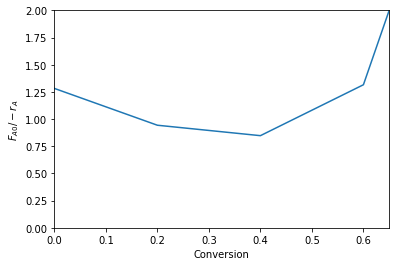

In [19]:
plt.plot(X, Fa0 / -ra)
plt.xlabel("Conversion")
plt.ylabel("$F_{A0} / -r_A$")
plt.xlim([0, 0.65])
plt.ylim([0, 2]);

We could iterate over the conversions and print the volume for each value. This is a little wasteful since we recompute the areas in each iteration, but here it is so fast it does not matter.

Before jumping into the integration an loop, Let's review array slicing. It allows us to select portions of arrays for analysis.

In [20]:
# X[start:below_end]
X = np.array([0, 0.2, 0.4, 0.6, 0.65])
X[0:3]  # This selects points with indices 0-2

array([0. , 0.2, 0.4])

We use -1 for the last element (-2 for second to last element, etc). Note that this *does not* include the last element.



In [21]:
X[1:-1]

array([0.2, 0.4, 0.6])

To get to the last element, we do not specify an end value like this:



In [22]:
X[1:]

array([0.2 , 0.4 , 0.6 , 0.65])

So, back to the integration. We need to use slices of the array for each integration step.



In [23]:
y = Fa0 / -ra  # An array

volumes = []  # empty list to store values in

for i in range(0, len(X)):
    vol = np.trapz(y[0 : i + 1], X[0 : i + 1])
    volumes += [
        vol
    ]  # here we accumulate the vol into our list, we concatenate two lists here
    print(f"At X={X[i]:3.2f} V={vol:1.3f} m^3")

volumes

At X=0.00 V=0.000 m^3
At X=0.20 V=0.223 m^3
At X=0.40 V=0.402 m^3
At X=0.60 V=0.618 m^3
At X=0.65 V=0.701 m^3


[0.0,
 0.22254475084663766,
 0.40163013620001153,
 0.617954846280297,
 0.7008495831224023]

An alternative approach is to use a cumulative trapezoid function. This is defined in `scipy.integrate`. The main benefit of this approach is that it is faster, as it does not recompute the areas, and the code is shorter, so there are less places to make mistakes!



array([0.22254475, 0.40163014, 0.61795485, 0.70084958])

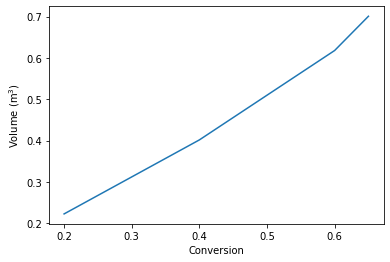

In [24]:
import scipy as sp

cumV = sp.integrate.cumtrapz(Fa0 / -ra, X)

plt.plot(X[1:], cumV)
plt.xlabel("Conversion")
plt.ylabel("Volume (m$^3$)")

cumV

array([0.        , 0.22254475, 0.40163014, 0.61795485, 0.70084958])

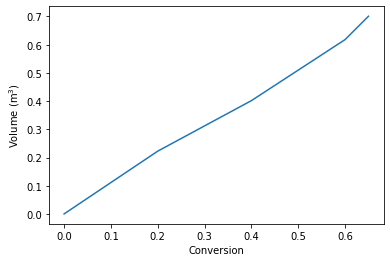

In [25]:
import scipy as sp

cumV = sp.integrate.cumtrapz(
    Fa0 / -ra, X, initial=0
)  # include initial to get the first value.

plt.plot(X, cumV)
plt.xlabel("Conversion")
plt.ylabel("Volume (m$^3$)")

cumV

In [26]:
?sp.integrate.cumtrapz

Signature: sp.integrate.cumtrapz(y, x=None, dx=1.0, axis=-1, initial=None)
Docstring:
An alias of `cumulative_trapezoid`.

`cumtrapz` is kept for backwards compatibility. For new code, prefer
`cumulative_trapezoid` instead.
File:      /opt/tljh/user/lib/python3.9/site-packages/scipy/integrate/_quadrature.py
Type:      function


What if you want to know the volume required for an intermediate conversion? For that you need interpolation. We will cover that later in the course when we talk more about dealing with data.



# Numerical quadrature - or integration of functions



When you have a function and you know its analytical form we can use quadrature to estimate integrals of it. In quadrature, we approximate the integral as a weighted sum of function values. By increasing the number values used, we can systematically improve the integral estimates.

To motivate the idea, let's consider the function integral of $y(x) = 7 x^3 - 8 x^2 - 3x +3$ from -1 to 1.

This is a third order polynomial, so we can in this case replace the integral with a sum of two points:

$\int f(x) dx = w_1 f(x_1) + w_2 f(x_2)$

provided we can find the weights, and the right values of $x$ to use. These are derived and tabulated (e.g. at [https://en.wikipedia.org/wiki/Gaussian_quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature)), which tells us for this case, the weights are simply equal to one, and we should use $\pm \sqrt{1/3}$ for x.



(0.6666666666666674, (0.6666666666666666, 4.721410046114446e-14))

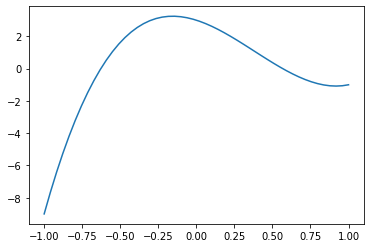

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

x = np.linspace(-1, 1)


def f(x):
    return 7 * x**3 - 8 * x**2 - 3 * x + 3


plt.plot(x, f(x))

f(np.sqrt(1 / 3)) + f(-np.sqrt(1 / 3)), quad(f, -1, 1)

This example is special in several ways:

1.  The formula was derived for $n^{th}$ order polynomials, here we had a 3rd order polynomial, so $n-1$ points are needed to exactly compute the integral. The formula is not exact for non-polynomial functions.
    For non-polynomial functions, the formula is an approximation to the integral and you have to use more than two points to estimate the integral. When you use more points, the weights change, but they can be looked up in the table, or computed.

I show this example mostly to motivate the idea that given a function, you can perform an integral by evaluating the function at special points, and weighting those function values appropriately. In practice, we don't do this manually. It has been coded already into robust libraries that we can reuse.

`scipy.integrate` provides the [quad](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) function. This is a Python wrapper around a sophisticated [Fortran library](https://en.wikipedia.org/wiki/QUADPACK) for integrating functions. These routines use an adaptive method to compute the integral and provide an upper bound on the error of the computed integral. The beauty of this interface is we can use a reliable, proven library written in Fortran inside of Python. We do not have to write and compile a Fortran program ourselves.



In [28]:
from scipy.integrate import quad

?quad

Signature:
quad(
    func,
    a,
    b,
    args=(),
    full_output=0,
    epsabs=1.49e-08,
    epsrel=1.49e-08,
    limit=50,
    points=None,
    weight=None,
    wvar=None,
    wopts=None,
    maxp1=50,
    limlst=50,
)
Docstring:
Compute a definite integral.

Integrate func from `a` to `b` (possibly infinite interval) using a
technique from the Fortran library QUADPACK.

Parameters
----------
func : {function, scipy.LowLevelCallable}
    A Python function or method to integrate. If `func` takes many
    arguments, it is integrated along the axis corresponding to the
    first argument.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

        double func(double x)
        double func(double x, void *user_data)
        double func(int n, double *xx)
        double func(int n, double *xx, void *user_data)

    The ``user_data`` is the data contained in the `scipy.LowLevelCallable`.
    In the call

We return to our simple integral, which should equal 21.



```{tip}

Don't try to memorize everything in the documentation above. It is there for reference. Instead, try to get a grasp on what is in there, and when you run into an issue with quad, go back to the documentation.
```

In [29]:
4**3 / 3 - 1 / 3  # analytical integral of x^2 from 1 to 4.

21.0

To use the quad function, we define a function, and use it as the first argument in the quad function. The quad function returns the integral value, and estimated error.



In [30]:
def f(x):
    return x**2


I, e = quad(f, 1, 4)
I, e

(21.000000000000004, 2.331468351712829e-13)

We can recompute the volume of a sphere much more precisely, and easily now. Recall $A(x) = \pi (1 - x^2)$ and that $V = \int_{-1}^{1} A(x) dx$. Here is the implementation.



In [31]:
def cross_section(x):
    return np.pi * (1 - x**2)


I, err = quad(cross_section, -1, 1)
I, err

(4.1887902047863905, 4.6504913306781755e-14)

In [32]:
4 / 3 * np.pi

4.1887902047863905

We can integrate to infinity.

$\int_{-\infty}^{\infty} \frac{1}{x^2 + 1} = \pi$.

Let us verify this. You can use &plusmn; &infin; as limits.



In [33]:
def f(x):
    return 1 / (x**2 + 1)


quad(f, -np.inf, np.inf)

(3.141592653589793, 5.155583041103855e-10)

Not all integrals are finite. For example

$\int_1^\infty \frac{dx}{x} = \infty$

Here we get an IntegrationWarning that a maximum number of subdivisions has been achieved.



In [34]:
def f(x):
    return 1 / x


Ibad, ebad = quad(f, 1, np.inf)

print(f"The answer is {Ibad}!!!")

The answer is 40.996012819169536!!!


<ipython-input-34-879f49e62408>:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Ibad, ebad = quad(f, 1, np.inf)


```{warning}
Computers will often give you a number that is wrong, and they will not always give you a warning or error!

It is your job to think critically about the results, and to assess if they make sense or not.
```

Math is fun though, this subtly different function is integrable:



In [35]:
def f(x):
    return 1 / x**2


quad(f, 1, np.inf)

(1.0, 1.1102230246251565e-14)

And this function is integrable, despite the singularity at x=0.



In [36]:
def f(x):
    return 1 / np.sqrt(x)


quad(f, 0, 1)

(1.9999999999999984, 5.773159728050814e-15)

## Find the volume of a PFR



For a single reaction that consumes a species A at a rate of $-r_A = k C_A$, a mole balance leads to an equation for the volume as a function of conversion $X$ as:

$V = \int_0^X \frac{F_{A_0}}{-r_A(X)} dX$

$F_{A_0}$ is the inlet molar flow of species A, which is equal to the inlet concentration times the inlet volumetric flow. The concentration of A in the reactor is a function of the conversion, and is given by  $C_A = C_{A_0} (1 - X)$. If $k = 0.23$ 1/min, $C_{A_0} = 1$ mol/L, and the volumetric flow is 1 L/min, what is the reactor volume required to achieve a conversion of 50%?

In [37]:
from scipy.integrate import quad

k = 0.23  # 1/min
Ca0 = 1.0  # 1 mol / L
v0 = 1.0  # L / min

Fa0 = v0 * Ca0  # derive molar flow rate


def rA(X):
    Ca = Ca0 * (1 - X)
    return -k * Ca


def integrand(X):
    return Fa0 / -rA(X)


vol, err = quad(integrand, 0, 0.5)
print(f"The required volume is {vol:1.3f} L")

The required volume is 3.014 L


Compare the verbose code above to this condensed code. Which is easier to read and understand?

In [38]:
def new_integrand(X):
    return Fa0 / (k * Ca0 * (1 - X))


quad(new_integrand, 0, 0.5)

(3.0136833937388925, 3.3458606926593995e-14)

## Diffusion



When the surface concentration of a solute is constant, and the solute diffused into a semi-infinite solid, the concentration of the solute in the solid varies with space and time according to:
$C_A(x, t) = C_{As} - (C_{As} - C_{A0}) erf\left(\frac{x}{\sqrt{4 D t}}\right)$.

$C_{As}$ is the concentration of the diffusing species at $x=0$, and $C_{A0}$ is the initial concentration of the species in the semi-infinite body.

and $erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-\xi^2} d\xi$

This integral arises from the solution to the differential equation describing diffusion. The integral does not have an analytical solution, but it can be solved numerically.

Suppose we have a steel sample #1 that initially contains 0.02% Carbon in it, and it is put in contact with another steel containing 1.2% carbon. If the diffusion coefficient of carbon is 1.54e-6 cm^2/s, what will the concentration of carbon in sample #1 be after 24 hours at x = 0.15 cm?



In [39]:
Cas = 1.2
Ca0 = 0.02
D = 1.54e-6  # cm^2/s
X = 0.15  # cm
t = 24 * 60 * 60  # time in seconds


xi = X / np.sqrt(4 * D * t)


def erf_integrand(xi):
    return 2 / np.sqrt(np.pi) * np.exp(-(xi**2))


erfx, err = quad(erf_integrand, 0, xi)

Cx = Cas - (Cas - Ca0) * erfx
print(
    f"The concentration of carbon at X = {X} cm after {t / 3600} hours is {Cx:1.2f}%."
)

The concentration of carbon at X = 0.15 cm after 24.0 hours is 0.93%.


In [40]:
Cas = 1.2 / 100  # This is in actual percent
Ca0 = 0.02 / 100
D = 1.54e-6  # cm^2/s
X = 0.15  # cm
t = 24 * 60 * 60  # time in seconds


xi = X / np.sqrt(4 * D * t)


def erf_integrand(xi):
    return 2 / np.sqrt(np.pi) * np.exp(-(xi**2))


erfx, err = quad(erf_integrand, 0, xi)

Cx = Cas - (Cas - Ca0) * erfx
print(
    f"The concentration of carbon at X = {X} cm after {t / 3600} hours is {Cx * 100:1.2f}%."
)

The concentration of carbon at X = 0.15 cm after 24.0 hours is 0.93%.


The [error function](https://en.wikipedia.org/wiki/Error_function), $erf(x)$ is such an important function it is implemented as a special function in scipy.special.



In [41]:
from scipy.special import erf

Cx_wspecial = Cas - (Cas - Ca0) * erf(xi)
print(
    f"The concentration of carbon at X = {X} cm after {t / 3600} hours is {Cx_wspecial*100:1.2f}%."
)

The concentration of carbon at X = 0.15 cm after 24.0 hours is 0.93%.


# Summary



The main points of this lecture were on

-   Numerical integration of data
    -   I recommend you rely on library implementations of the trapezoid method or Simpson's method where possible.
    -   `numpy.trapz`, `scipy.integrate.cumtrapz`, and `scipy.integrate.simps`.

-   Integration of functions by quadrature
    -   quadrature uses a weighted sum of function evaluations to estimate the integrals.
    -   I recommend you rely on a library implementation of a quadrature
        -   e.g. `scipy.integrate.quad`.
        -   These libraries provide sophisticated convergence algorithms and error estimates

Next time we will consider using integration to obtain solutions to differential equations.



In [42]:
# review some commands from today
from jupytercards import display_flashcards
display_flashcards('flash.json')

<IPython.core.display.Javascript object>

In [43]:
from jupyterquiz import display_quiz
display_quiz('.quiz.json')

<IPython.core.display.Javascript object>